<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileMedication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')

In [3]:
import pandas as pd
prescription = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Prescription.csv')
prescription.shape

(9530452, 10)

In [4]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from visit['PatientUID'] that are not in the list
prescription = prescription[~prescription['PatientUID'].isin(patient_uid_list)]
prescription.shape

(7845039, 10)

In [5]:
df1 = pd.DataFrame(prescription)

# **DrugSummaryDF**


In [6]:
df = pd.DataFrame(prescription)

In [7]:
import pandas as pd
import re

# Lowercase and store values from 'DrugName' column
drugCol1 = [str(i).lower() for i in df['DrugName']]

# Lowercase and store values from 'GenericName' column
genericCol1 = [str(i).lower() for i in df['GenericName']]

# Store drug names
drugCol2 = []
genericCol2 = []

# Process 'DrugName' column
for value in drugCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            drugCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            drugCol2.append(newval)

# Process 'GenericName' column
for value in genericCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            genericCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            genericCol2.append(newval)

# Replace unwanted words and remove words starting with 'no.' and the digits following them
words_to_remove = ['inj', 'cap', 'mg', 'ml', 'tab', '[7402]', '[5702]', '[5703]', '[0604]', '[5606]', '[024840]', '[napha]', '[5704]', '(ฝาก)', '(เลิกใช้)']

drugCol3 = []
for i in drugCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    drugCol3.append(i.strip())

In [8]:
genericCol3 = []
for i in genericCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    genericCol3.append(i.strip())

In [9]:
# Create DataFrame with 'DrugName' and 'GenericName' columns
df_combined = pd.DataFrame({'DrugName': drugCol3, 'GenericName': genericCol3})

# Count unique values for 'DrugName'
drug_value_counts = df_combined['DrugName'].value_counts()

# Count unique values for 'GenericName'
generic_value_counts = df_combined['GenericName'].value_counts()

In [10]:
df_combined

,DrugName,GenericName
0,folic acid,folivit
1,vitamin b complex,vitamin b complex
2,losartan(loranta),loranta film-coated
3,lorazepam(anxira),anxira
4,chalk-1.5,chalk
...,...,...
7845034,infusion plabottle set (iv.set),nan
7845035,normal saline,normal saline
7845036,normal saline,normal saline
7845037,minimun volume extension with t connector,nan


In [11]:
df

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,2299,2024049,2558-02-19 14:48:15.693,Folic Acid 5 mg TAB,Folivit tab 5 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,2299,2024049,2558-02-19 14:48:15.693,Vitamin B Complex TAB,Vitamin B Complex TAB,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2299,2024049,2558-02-19 14:48:15.693,losartan(Loranta) 50 mg TAB,Loranta film-coated tab 50 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(Anxira) 0.5 mg TAB,Anxira tab 0.5 mg,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,2299,2024049,2558-02-19 14:47:55.953,ChalkTAB-1.5 TAB,Chalktab 1500 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...
9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0
9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0


In [12]:
pre_drug = df_combined['DrugName'].value_counts().reset_index()
pre_drug.columns = ['DrugName', 'Count']

pre_generic = df_combined['GenericName'].value_counts().reset_index()
pre_generic.columns = ['GenericName', 'Count']

pre_count = df_combined.groupby(['DrugName', 'GenericName']).size().reset_index()
pre_count.columns = ['DrugName', 'GenericName', 'Count']

In [13]:
DrugSummary = pd.DataFrame(pre_count)
DrugSummary #4517

,DrugName,GenericName,Count
0,2% chlorhexidine in 70% alcohol 450,2% chlorhexidine in 70% alcohol 500,31
1,3tc 150,3tc 150,720
2,3tc 300,lamivir,268
3,3tc lamivudine 150,lamivudine mylan film-coated,10109
4,5-fu 10/0.2 . for subconjunctival,5-fu 10/0.2 . for subconjunctival,19
...,...,...,...
4512,ไหมเย็บเนื้อเยื่อเข้ากับสมอยึดตรีงกระดูก(ultra...,nan,4
4513,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากพ...,nan,1
4514,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1
4515,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1


In [14]:
#DrugSummary = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 4 : ReCountValue/DrugSummary.csv')

In [15]:
#df_combined = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 4 : ReCountValue/df_combined.csv')

# **Slope**
> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**

In [16]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/Slope.xlsx')

In [17]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]
data = data.dropna()

In [18]:
df = pd.DataFrame(data)

# Sort the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(by=['PatientUID', 'PatientVisitUID'])

# Create a new column to store the previous slope value
df['PreviousSlope'] = df['Slopes'].shift(1)

# Update the Slopes column with the PreviousSlope values
df['Slopes'] = df['PreviousSlope']

# Drop the PreviousSlope column
df = df.drop(columns=['PreviousSlope'])
data = df.dropna()

# **Update Cleaned Value**
>> **into PrescriptionDF**

In [19]:
test = prescription.reset_index()
test

,index,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,0,2299,2024049,2558-02-19 14:48:15.693,Folic Acid 5 mg TAB,Folivit tab 5 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,1,2299,2024049,2558-02-19 14:48:15.693,Vitamin B Complex TAB,Vitamin B Complex TAB,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2,2299,2024049,2558-02-19 14:48:15.693,losartan(Loranta) 50 mg TAB,Loranta film-coated tab 50 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(Anxira) 0.5 mg TAB,Anxira tab 0.5 mg,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,4,2299,2024049,2558-02-19 14:47:55.953,ChalkTAB-1.5 TAB,Chalktab 1500 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...,...
7845034,9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0
7845035,9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845036,9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845037,9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0


In [20]:
test.update(df_combined)

In [21]:
prescription = test.iloc[:, 1:]

# **DrugList**

In [22]:
prescription_mapping = {
    'Anti-hypertensive1': [2607,4452,8,528,529],
    'Anti-hypertensive2': [1207,1367,1368,2466,2467,174,1474,661],
    'Anti-hypertensive3': [877,878,1393,1320],
    'Anti-hypertensive4': [658,1216],
    'Anti-hypertensive5': [961,962,963,964,965,123,1100,431,1509],
    'Anti-hypertensive6': [2161],
    'Anti-hypertensive7': [1463,1834,1866,362,506],
    'Anti-hypertensive8': [696,370,371],
    'Anti-hypertensive9': [1096,94,1494,1495,1496],
    'Anti-hyperglycemic1': [117,1000,1001,1002,1003,634,635,636],
    'Anti-hyperglycemic2': [1235,2071,2579,46,1007,1008,1009],
    'Anti-hyperglycemic3': [1235,1236,2604,2380,1699,1021,2597],
    'Anti-hyperglycemic4': [1783,1699,45,46],
    'Anti-hyperglycemic5': [1380,1237,1021,1200,944],
    'Anti-hyperglycemic6': [1166,1167,1168,1169,1306,2366,1639,1640,1641,1503],
    'Anti-hyperglycemic7': [1715],
    'Anti-lipid1': [206,207,208,209,1468,2003,2094,1352,539,1345,2542],
    'Anti-lipid2': [861,862],
    'Anti-lipid3': [883,884,885],
    'Anti-hyperuricemia1': [106,107],
    'Anti-hyperuricemia2': [874],
    'Anti-hyperuricemia3': [1850,257],
    'OtherMedication1': [1263],
    'OtherMedication2': [642,643,396,1119,1120,1121,1122,1123,1401,1430,814,180,1558]
}


In [23]:
# Create new columns for labels
prescription['LabelDrug'] = ""
prescription['LabelGeneric'] = ""

# Iterate through the prescription_mapping dictionary and update 'LabelDrug' and 'LabelGeneric' columns
for prescription_name, indices in prescription_mapping.items():
    result_item_names = pre_count[pre_count.index.isin(indices)]['DrugName'].tolist()
    result_generic_names = pre_count[pre_count.index.isin(indices)]['GenericName'].tolist()
    prescription.loc[prescription['DrugName'].isin(result_item_names), 'LabelDrug'] = prescription_name
    prescription.loc[prescription['GenericName'].isin(result_generic_names), 'LabelGeneric'] = prescription_name

In [24]:
pre0 = pd.DataFrame(prescription)

In [25]:
pre0.columns
#pre0[pre0['DrugName']=='glucophage'].shape

Index(['PatientUID', 'PatientVisitUID', 'DispensedDttm', 'DrugName',
       'GenericName', 'Quantity', 'DrugFrequency', 'Dosage', 'DosageForm',
       'DrugDuration', 'LabelDrug', 'LabelGeneric'],
      dtype='object')

### **Define** ✔
```
we won't use the #26 values that have fill the label as
mapping value but not the index we want for example:
```
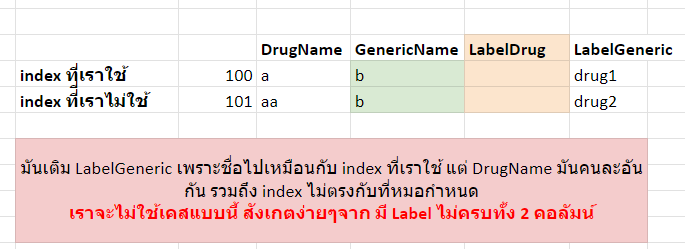

> **Re-Check Mapping**

In [26]:
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive1') & (pre0['LabelGeneric'] == 'Anti-hypertensive1')] #>> 83390
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive2') & (pre0['LabelGeneric'] == 'Anti-hypertensive2')] #>> 89108
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive3') & (pre0['LabelGeneric'] == 'Anti-hypertensive3')] #>> 131734
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive4') & (pre0['LabelGeneric'] == 'Anti-hypertensive4')] #>> 28497
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive5') & (pre0['LabelGeneric'] == 'Anti-hypertensive5')] #>> 61242
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive6') & (pre0['LabelGeneric'] == 'Anti-hypertensive6')] #>> 19577
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive7') & (pre0['LabelGeneric'] == 'Anti-hypertensive7')] #>> 142002
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive8') & (pre0['LabelGeneric'] == 'Anti-hypertensive8')] #>> 71571
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hypertensive9') & (pre0['LabelGeneric'] == 'Anti-hypertensive9')] #>> 87592

#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic1') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic1')] #>> 72286
#
#
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic4') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic4')].shape #>> 20906
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic5') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic5')].shape #>> 8499
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic6') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic6')].shape #>> 46768
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic7') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic7')].shape #>> 42

#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid1') & (pre0['LabelGeneric'] == 'Anti-lipid1')].shape #>> 342796
#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid2') & (pre0['LabelGeneric'] == 'Anti-lipid2')].shape #>> 15207
#pre0.loc[(pre0['LabelDrug'] == 'Anti-lipid3') & (pre0['LabelGeneric'] == 'Anti-lipid3')].shape #>> 7258

#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia1') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia1')].shape #>> 55898
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia2') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia2')].shape #>> 2259
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperuricemia3') & (pre0['LabelGeneric'] == 'Anti-hyperuricemia3')].shape #>> 1100

#pre0.loc[(pre0['LabelDrug'] == 'OtherMedication1') & (pre0['LabelGeneric'] == 'OtherMedication1')].shape #>> 4169
#pre0.loc[(pre0['LabelDrug'] == 'OtherMedication2') & (pre0['LabelGeneric'] == 'OtherMedication2')].shape #>> 43981

>**Problem Group เกิดจาก index ซ้ำ**

In [27]:
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic2') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic2')].shape #>> ต้องมี125284 xxxxx 120310
#pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic3') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic3')].shape #>> 33849 xxxx 30473

In [28]:
pre_count.iloc[[1235,1699,1021,46]]

,DrugName,GenericName,Count
1235,janumet,janumet,4525
1699,oseni,oseni,3347
1021,glyxambi,glyxambi,29
46,actosmet,actosmet,449


In [29]:
#pre0.loc[(pre0['DrugName'] == 'janumet') & (pre0['GenericName'] == 'janumet')] ##ยา 1235 ควรเป็นทั้ง Anti-hyperglycemic2 และ ตอนนี้เป็น Anti-hyperglycemic3
#pre0.loc[(pre0['DrugName'] == 'oseni') & (pre0['GenericName'] == 'oseni')] ##ยา 1699 ควรอยู่ทั้ง Anti-hyperglycemic3 และ ตอนนี้เป็น Anti-hyperglycemic4
#pre0.loc[(pre0['DrugName'] == 'glyxambi') & (pre0['GenericName'] == 'glyxambi')]  ##ยา 1021 อยู่ทั้ง Anti-hyperglycemic3 และ ตอนนี้เป็น Anti-hyperglycemic5
#pre0.loc[(pre0['DrugName'] == 'actosmet') & (pre0['GenericName'] == 'actosmet')]  ##ยา 46 ควรเป็นทั้ง Anti-hyperglycemic2 และ ตอนนี้เป็น Anti-hyperglycemic4

>> **Add Dup rows and change mapping value into another drug group that have dup index**

In [30]:
# Duplicate rows for janumet
janumet_rows = pre0.loc[(pre0['DrugName'] == 'janumet') & (pre0['GenericName'] == 'janumet')].copy()
janumet_rows['LabelDrug'] = 'Anti-hyperglycemic2'
janumet_rows['LabelGeneric'] = 'Anti-hyperglycemic2'
pre0 = pre0.append(janumet_rows)

# Duplicate rows for oseni
oseni_rows = pre0.loc[(pre0['DrugName'] == 'oseni') & (pre0['GenericName'] == 'oseni')].copy()
oseni_rows['LabelDrug'] = 'Anti-hyperglycemic3'
oseni_rows['LabelGeneric'] = 'Anti-hyperglycemic3'
pre0 = pre0.append(oseni_rows)

# Duplicate rows for glyxambi
glyxambi_rows = pre0.loc[(pre0['DrugName'] == 'glyxambi') & (pre0['GenericName'] == 'glyxambi')].copy()
glyxambi_rows['LabelDrug'] = 'Anti-hyperglycemic3'
glyxambi_rows['LabelGeneric'] = 'Anti-hyperglycemic3'
pre0 = pre0.append(glyxambi_rows)

# Duplicate rows for actosmet
actosmet_rows = pre0.loc[(pre0['DrugName'] == 'actosmet') & (pre0['GenericName'] == 'actosmet')].copy()
actosmet_rows['LabelDrug'] = 'Anti-hyperglycemic2'
actosmet_rows['LabelGeneric'] = 'Anti-hyperglycemic2'
pre0 = pre0.append(actosmet_rows)



<ipython-input-30-045da68f8aff>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre0 = pre0.append(janumet_rows)
<ipython-input-30-045da68f8aff>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre0 = pre0.append(oseni_rows)
<ipython-input-30-045da68f8aff>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre0 = pre0.append(glyxambi_rows)
<ipython-input-30-045da68f8aff>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pre0 = pre0.append(actosmet_rows)


In [31]:
pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic2') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic2')].shape ##ต้องมี 125284

(125284, 12)

In [32]:
pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic3') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic3')].shape ##ต้องมี 33849

(33849, 12)

In [33]:
pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic4') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic4')].shape ##ต้องมี 20906

(20906, 12)

In [34]:
pre0.loc[(pre0['LabelDrug'] == 'Anti-hyperglycemic5') & (pre0['LabelGeneric'] == 'Anti-hyperglycemic5')].shape ##ต้องมี 8499

(8499, 12)



```
continue code
```



In [35]:
prescription = pre0[(pre0['LabelDrug'] == pre0['LabelGeneric']) & (pre0['LabelDrug'] != '')]

In [36]:
prescription

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
2,2299,2024049,2558-02-19 14:48:15.693,losartan(loranta),loranta film-coated,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,Anti-hypertensive2,Anti-hypertensive2
15,2299,2237669,2558-05-21 12:58:52.017,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
16,2299,2237669,2558-05-21 12:58:52.017,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
22,2299,2480434,2558-08-27 15:27:49.377,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
23,2299,2480434,2558-08-27 15:27:49.377,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
...,...,...,...,...,...,...,...,...,...,...,...,...
6635470,2246941,4682211,2560-11-18 12:00:53.093,actosmet,actosmet,100.0,od with meal M|วันละ 1 ครั้งพร้อมอาหารเช้า,1.0,1 TAB,100.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6635479,2246941,4254772,2560-06-24 13:12:08.020,actosmet,actosmet,50.0,od with meal M|วันละ 1 ครั้งพร้อมอาหารเช้า,1.0,1 TAB,50.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6854210,2450318,4173745,2560-05-28 12:21:42.347,actosmet,actosmet,60.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,30.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6854212,2450318,4234382,2560-06-18 13:16:36.463,actosmet,actosmet,200.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,100.0,Anti-hyperglycemic2,Anti-hyperglycemic2


In [37]:
prescription

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
2,2299,2024049,2558-02-19 14:48:15.693,losartan(loranta),loranta film-coated,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,Anti-hypertensive2,Anti-hypertensive2
15,2299,2237669,2558-05-21 12:58:52.017,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
16,2299,2237669,2558-05-21 12:58:52.017,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
22,2299,2480434,2558-08-27 15:27:49.377,losartan(loranta),loranta film-coated,104.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,104.0,Anti-hypertensive2,Anti-hypertensive2
23,2299,2480434,2558-08-27 15:27:49.377,simvastatin(bestatin),bestatin,52.0,hs |วันละ 1 ครั้ง ก่อนนอน,0.5,0.5 TAB,104.0,Anti-lipid1,Anti-lipid1
...,...,...,...,...,...,...,...,...,...,...,...,...
6635470,2246941,4682211,2560-11-18 12:00:53.093,actosmet,actosmet,100.0,od with meal M|วันละ 1 ครั้งพร้อมอาหารเช้า,1.0,1 TAB,100.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6635479,2246941,4254772,2560-06-24 13:12:08.020,actosmet,actosmet,50.0,od with meal M|วันละ 1 ครั้งพร้อมอาหารเช้า,1.0,1 TAB,50.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6854210,2450318,4173745,2560-05-28 12:21:42.347,actosmet,actosmet,60.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,30.0,Anti-hyperglycemic2,Anti-hyperglycemic2
6854212,2450318,4234382,2560-06-18 13:16:36.463,actosmet,actosmet,200.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,100.0,Anti-hyperglycemic2,Anti-hyperglycemic2



# **DrugWideTable**

In [38]:
import numpy as np
# Step 1: Add an additional column to distinguish duplicate entries
prescription['DuplicateIndex'] = prescription.groupby(['PatientUID', 'PatientVisitUID']).cumcount()

# Step 2: Pivot the 'lab' DataFrame
prescription_pivoted = prescription.pivot(index=['PatientUID', 'PatientVisitUID', 'DuplicateIndex'], columns='LabelDrug', values='DrugDuration')

# Step 3: Reset the index to match the desired format
prescription_pivoted = prescription_pivoted.reset_index()

# Step 4: Fill NaN values with None using numpy.nan
prescription_pivoted = prescription_pivoted.where(pd.notna(prescription_pivoted), np.nan)

# Step 5: Merge 'CWhen' from 'prescription' into the pivoted DataFrame
final_result = pd.merge(data, prescription_pivoted, on=['PatientUID', 'PatientVisitUID'], how='left')

<ipython-input-38-a099a8d776d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescription['DuplicateIndex'] = prescription.groupby(['PatientUID', 'PatientVisitUID']).cumcount()


## **Duplicate column**

**จากการที่มันเป็น Duration ของการใช้ยา เราต้องนำค่ามาบวกกัน**

In [39]:
final_result[final_result.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,Anti-hyperglycemic1,Anti-hyperglycemic2,Anti-hyperglycemic3,Anti-hyperglycemic4,Anti-hyperglycemic5,Anti-hyperglycemic6,...,Anti-hypertensive8,Anti-hypertensive9,Anti-hyperuricemia1,Anti-hyperuricemia2,Anti-hyperuricemia3,Anti-lipid1,Anti-lipid2,Anti-lipid3,OtherMedication1,OtherMedication2
0,2299,5812902,-7.158596,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
1,2299,5812902,-7.158596,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2,2299,5812902,-7.158596,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,5812902,-7.158596,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,2299,6947220,5.550691,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164363,3319971,10553916,-4.256753,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN
164364,3319971,10553916,-4.256753,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164365,3319971,10553916,-4.256753,6.0,NaN,NaN,105.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164366,3320048,10572126,-0.692078,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
final_result[final_result['PatientVisitUID']==6432026.0]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,Anti-hyperglycemic1,Anti-hyperglycemic2,Anti-hyperglycemic3,Anti-hyperglycemic4,Anti-hyperglycemic5,Anti-hyperglycemic6,...,Anti-hypertensive8,Anti-hypertensive9,Anti-hyperuricemia1,Anti-hyperuricemia2,Anti-hyperuricemia3,Anti-lipid1,Anti-lipid2,Anti-lipid3,OtherMedication1,OtherMedication2
267,4493,6432026,20.002342,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
268,4493,6432026,20.002342,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,4493,6432026,20.002342,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
270,4493,6432026,20.002342,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,4493,6432026,20.002342,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,4493,6432026,20.002342,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
273,4493,6432026,20.002342,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,4493,6432026,20.002342,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
275,4493,6432026,20.002342,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,4493,6432026,20.002342,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [41]:
# List of columns to sum
columns_to_sum = ['Anti-hypertensive2', 'Anti-lipid1', 'OtherMedication2', 'Anti-hypertensive5',
                  'Anti-hypertensive7', 'Anti-hypertensive3', 'Anti-hypertensive6',
                  'Anti-hypertensive1', 'Anti-hyperglycemic2', 'Anti-hyperglycemic3',
                  'Anti-hyperglycemic1', 'Anti-lipid3', 'Anti-hyperglycemic5',
                  'Anti-hyperuricemia1', 'Anti-hypertensive9', 'Anti-hypertensive8',
                  'Anti-hyperglycemic6', 'Anti-hyperglycemic4', 'Anti-hyperuricemia2',
                  'Anti-lipid2', 'Anti-hypertensive4', 'OtherMedication1',
                  'Anti-hyperglycemic7', 'Anti-hyperuricemia3']

# Group by the specified columns and sum the values in the specified columns
sumdf = final_result.groupby(['PatientUID', 'PatientVisitUID', 'Slopes'])[columns_to_sum].sum().reset_index()


# **check**

In [42]:
sumdf.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'Anti-hypertensive2',
       'Anti-lipid1', 'OtherMedication2', 'Anti-hypertensive5',
       'Anti-hypertensive7', 'Anti-hypertensive3', 'Anti-hypertensive6',
       'Anti-hypertensive1', 'Anti-hyperglycemic2', 'Anti-hyperglycemic3',
       'Anti-hyperglycemic1', 'Anti-lipid3', 'Anti-hyperglycemic5',
       'Anti-hyperuricemia1', 'Anti-hypertensive9', 'Anti-hypertensive8',
       'Anti-hyperglycemic6', 'Anti-hyperglycemic4', 'Anti-hyperuricemia2',
       'Anti-lipid2', 'Anti-hypertensive4', 'OtherMedication1',
       'Anti-hyperglycemic7', 'Anti-hyperuricemia3'],
      dtype='object')

In [43]:
sumdf[sumdf['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,Slopes,Anti-hypertensive2,Anti-lipid1,OtherMedication2,Anti-hypertensive5,Anti-hypertensive7,Anti-hypertensive3,Anti-hypertensive6,...,Anti-hypertensive9,Anti-hypertensive8,Anti-hyperglycemic6,Anti-hyperglycemic4,Anti-hyperuricemia2,Anti-lipid2,Anti-hypertensive4,OtherMedication1,Anti-hyperglycemic7,Anti-hyperuricemia3
2,2299,8186767,-6.06371,100.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
prescription[prescription['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric,DuplicateIndex
274,2299,8186767,2564-03-04 12:07:58.707,celebrex,celebrex,60.0,prn|เวลามีอาการ,1.0,1 CAP,14.0,OtherMedication2,OtherMedication2,0
277,2299,8186767,2564-03-04 12:08:19.623,losartan(loranta),loranta film-coated,100.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,100.0,Anti-hypertensive2,Anti-hypertensive2,1
279,2299,8186767,2564-03-04 12:08:25.517,celebrex,celebrex,14.0,prn|เวลามีอาการ,1.0,1 CAP,1.0,OtherMedication2,OtherMedication2,2


In [45]:
DrugDF = pd.DataFrame(sumdf)

## **Rename Columns**

In [46]:
column_rename_dict = {
    'Anti-hypertensive1': 'G1M1:ACEI',
    'Anti-hypertensive2': 'G1M2:ARB',
    'Anti-hypertensive3': 'G1M3:Dihydropyridine CCB',
    'Anti-hypertensive4': 'G1M4:Non-dihydropyridine CCB',
    'Anti-hypertensive5': 'G1M5:Diuretic',
    'Anti-hypertensive6': 'G1M6:MRA',
    'Anti-hypertensive7': 'G1M7:Beta blocker',
    'Anti-hypertensive8': 'G1M8:Alpha blocker',
    'Anti-hypertensive9': 'G1M9:Vasodilator',
    'Anti-hyperglycemic1': 'G2M1:SU',
    'Anti-hyperglycemic2': 'G2M2:Metformin',
    'Anti-hyperglycemic3': 'G2M3:DPP4 inhibitor',
    'Anti-hyperglycemic4': 'G2M4:TZD',
    'Anti-hyperglycemic5': 'G2M5:SGLT2i',
    'Anti-hyperglycemic6': 'G2M6:Insulin',
    'Anti-hyperglycemic7': 'G2M7:GLP1-RA',
    'Anti-lipid1': 'G3M1:Statin',
    'Anti-lipid2': 'G3M2:Ezetimibe',
    'Anti-lipid3': 'G3M3:Fibrate',
    'Anti-hyperuricemia1': 'G4M1:Allopurinol',
    'Anti-hyperuricemia2': 'G4M2:Febuxostat',
    'Anti-hyperuricemia3': 'G4M3:Uricosuric agent',
    'OtherMedication1': 'G5M1:Ketoanalog amino acid',
    'OtherMedication2': 'G5M2:NSAIDs'
}
# Use the rename method to rename the columns
DrugDF.rename(columns=column_rename_dict, inplace=True)
DrugDF

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,G1M9:Vasodilator,G1M8:Alpha blocker,G2M6:Insulin,G2M4:TZD,G4M2:Febuxostat,G3M2:Ezetimibe,G1M4:Non-dihydropyridine CCB,G5M1:Ketoanalog amino acid,G2M7:GLP1-RA,G4M3:Uricosuric agent
0,2299,5812902,-7.158596,100.0,100.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2299,6947220,5.550691,35.0,0.0,1.0,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2299,8186767,-6.063710,100.0,0.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2299,9385133,-12.812245,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2304,4916314,28.287500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3319961,10553903,10.568365,105.0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0
52615,3319971,10553916,-4.256753,0.0,105.0,0.0,0.0,0.0,105.0,0.0,...,0.0,105.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0
52616,3320048,10572126,-0.692078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52617,3320050,10572565,7.217875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
DrugDF.to_excel('DrugDF.xlsx')